In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:, 3:5].values

In [4]:
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

In [5]:
af = AffinityPropagation(preference=-100, random_state=5).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [6]:
labels

array([ 0,  1,  2,  1,  0,  1,  2,  4,  2,  1,  3,  4,  3,  1,  3,  1,  0,
        5,  7,  4,  7,  5,  9,  5, 11,  6,  7,  8,  7,  6,  9, 12,  9, 10,
       11,  6, 11, 12, 13, 12, 14, 10, 14, 15, 13, 15, 15, 16, 16, 16, 17,
       15, 17, 15, 16, 16, 18, 16, 18, 16, 17, 17, 18, 17, 18, 17, 18, 18,
       17, 18, 17, 20, 18, 17, 20, 19, 19, 20, 19, 20, 19, 19, 20, 20, 19,
       20, 19, 19, 22, 20, 22, 23, 21, 23, 23, 22, 21, 21, 23, 21, 23, 21,
       22, 22, 22, 23, 21, 21, 23, 21, 22, 22, 23, 21, 21, 21, 23, 24, 23,
       24, 24, 23, 24, 25, 27, 26, 27, 25, 28, 26, 28, 26, 27, 26, 28, 31,
       28, 26, 28, 26, 28, 25, 29, 31, 30, 25, 29, 32, 30, 31, 30, 31, 30,
       32, 30, 31, 33, 32, 33, 32, 29, 31, 33, 31, 34, 37, 34, 35, 34, 37,
       36, 37, 36, 35, 36, 35, 36, 37, 36, 38, 39, 38, 40, 38, 39, 38, 40,
       41, 40, 38, 40, 41, 42, 43, 44, 46, 45, 46, 47, 48])

In [7]:
n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)


Estimated number of clusters: 49


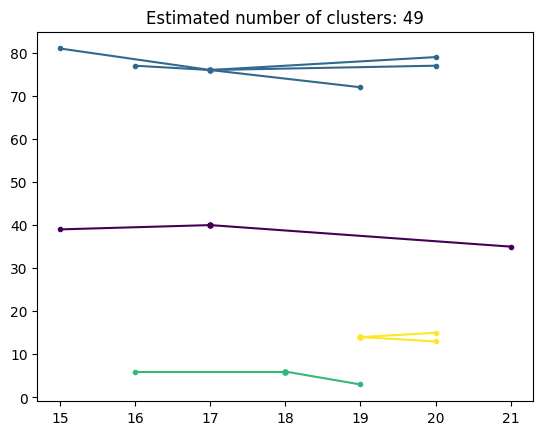

In [8]:
#Took this code from scikit Learn
import matplotlib.pyplot as plt

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

C:\Users\gssan\AppData\Local\Temp\ipykernel_27708\2475767290.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


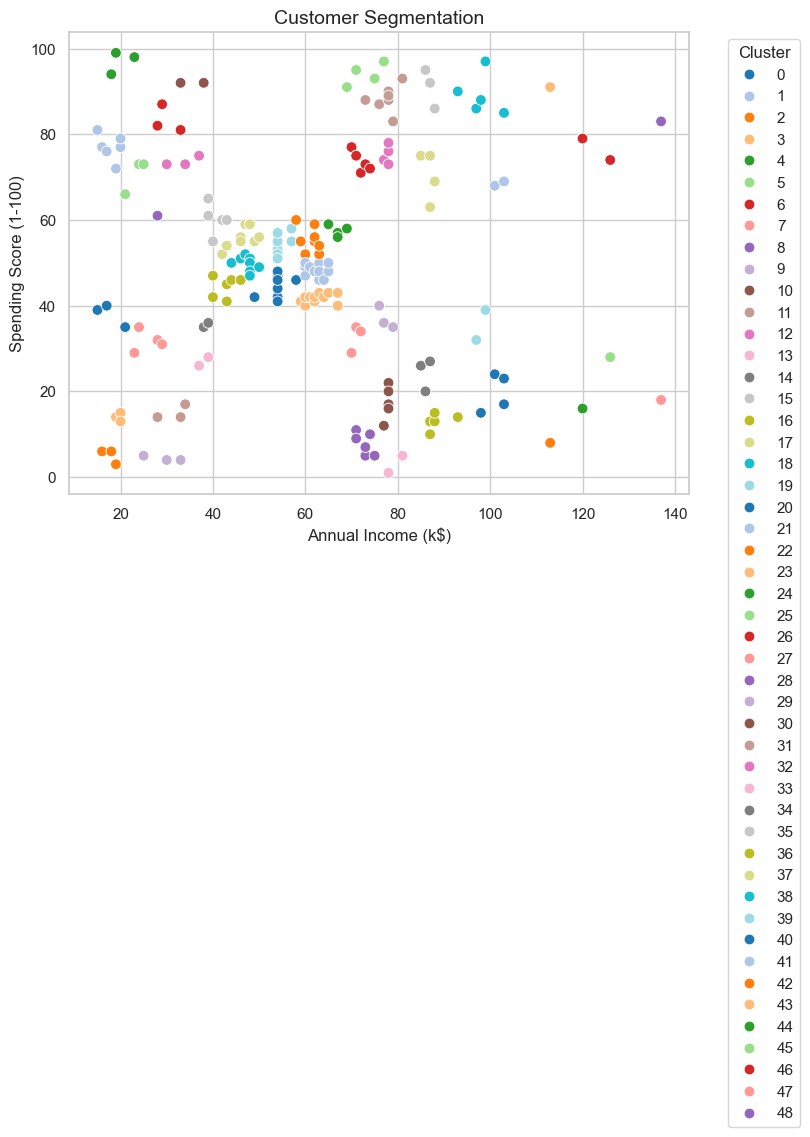

In [19]:
# Simple scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=supervised,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab20',
    s=60
)
plt.title("Customer Segmentation", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
supervised=dataset
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
supervised.to_csv("cluster.csv",index=False)

In [11]:
supervised.columns[3]

'Annual Income (k$)'

In [12]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
# Add cluster labels
supervised['Cluster'] = labels
labels

array([ 0,  1,  2,  1,  0,  1,  2,  4,  2,  1,  3,  4,  3,  1,  3,  1,  0,
        5,  7,  4,  7,  5,  9,  5, 11,  6,  7,  8,  7,  6,  9, 12,  9, 10,
       11,  6, 11, 12, 13, 12, 14, 10, 14, 15, 13, 15, 15, 16, 16, 16, 17,
       15, 17, 15, 16, 16, 18, 16, 18, 16, 17, 17, 18, 17, 18, 17, 18, 18,
       17, 18, 17, 20, 18, 17, 20, 19, 19, 20, 19, 20, 19, 19, 20, 20, 19,
       20, 19, 19, 22, 20, 22, 23, 21, 23, 23, 22, 21, 21, 23, 21, 23, 21,
       22, 22, 22, 23, 21, 21, 23, 21, 22, 22, 23, 21, 21, 21, 23, 24, 23,
       24, 24, 23, 24, 25, 27, 26, 27, 25, 28, 26, 28, 26, 27, 26, 28, 31,
       28, 26, 28, 26, 28, 25, 29, 31, 30, 25, 29, 32, 30, 31, 30, 31, 30,
       32, 30, 31, 33, 32, 33, 32, 29, 31, 33, 31, 34, 37, 34, 35, 34, 37,
       36, 37, 36, 35, 36, 35, 36, 37, 36, 38, 39, 38, 40, 38, 39, 38, 40,
       41, 40, 38, 40, 41, 42, 43, 44, 46, 45, 46, 47, 48])

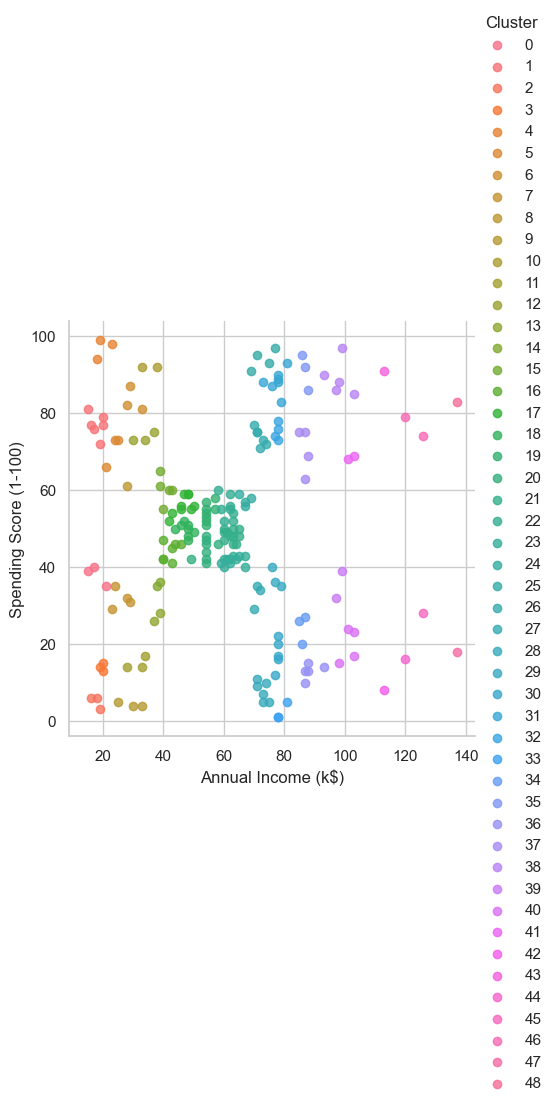

In [23]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x="Annual Income (k$)", y="Spending Score (1-100)", hue=supervised.columns[5],
                   fit_reg=False, legend=True)